# Is Home Advantage Real

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Load our 3 datasets
Countries = pd.read_csv("https://raw.githubusercontent.com/djmaan/Data-Science-Project/master/Home_advatage_in_sports/Country_facts.csv")
NBA = pd.read_csv("https://raw.githubusercontent.com/djmaan/Data-Science-Project/master/Home_advatage_in_sports/NBA.csv", encoding = "ISO-8859-1")
Soccer = pd.read_csv("https://raw.githubusercontent.com/djmaan/Data-Science-Project/master/Home_advatage_in_sports/SoccerLEagues.csv", encoding = "ISO-8859-1")

In [2]:
Countries.head()

,Country,Region,Population,Area,PopDensity,Coastline,Net migration,Infant_mortality,GDP,Literacy,Phones,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,FIFA_Rank,UEFA_Rank,Attendance,Home_Away_Contrast
0,Nigeria,SUB-SAHARAN AFRICA,131859731,923768,142.7,0.09,0.26,98.80,900.0,68.0,9.3,31.29,2.96,65.75,1.5,40.43,16.94,0.269,0.487,0.244,62,NaN,NaN,0.836696
1,Guatemala,LATIN AMER. & CARIB,12293545,108890,112.9,0.37,-1.67,35.93,4100.0,70.6,92.1,12.54,5.03,82.43,2.0,29.88,5.20,0.227,0.188,0.585,95,NaN,NaN,0.641629
2,Indonesia,ASIA (EX. NEAR EAST),245452739,1919440,127.9,2.85,0.00,35.60,3200.0,87.9,52.0,11.32,7.23,81.45,2.0,20.34,6.25,0.134,0.458,0.408,178,NaN,9368.0,0.586193
3,Ghana,SUB-SAHARAN AFRICA,22409572,239460,93.6,0.23,-0.64,51.43,2200.0,74.8,14.4,16.26,9.67,74.07,2.0,30.52,9.72,0.366,0.246,0.387,41,NaN,NaN,0.558027
4,Uzbekistan,C.W. OF IND. STATES,27307134,447400,61.0,0.00,-1.72,71.10,1700.0,99.3,62.9,10.83,0.83,88.34,1.0,26.36,7.84,0.342,0.229,0.430,74,NaN,6911.0,0.486008


In [3]:
NBA.head()

,Year,Team,Wins,Loss,Home Wins,Home Loss,Away Wins,Away Loss,HomePCT,AwayPCT,TotalPCT
0,1968,Atlanta Hawks,48,34,28,12,18,21,0.700000,0.461538,0.585366
1,1969,Atlanta Hawks,48,34,25,13,18,16,0.657895,0.529412,0.585366
2,1970,Atlanta Hawks,36,46,21,20,14,26,0.512195,0.350000,0.439024
3,1971,Atlanta Hawks,36,46,22,19,13,26,0.536585,0.333333,0.439024
4,1972,Atlanta Hawks,46,36,28,13,17,23,0.682927,0.425000,0.560976


In [4]:
Soccer.head()

,Sport,Country,League,Year,Season,Team,Games,HomeWins,HomeDraw,HomeLoss,HomeRatio,AwayWins,AwayDraw,AwayLoss,AwayGoalsDiff,Unnamed: 15
0,Football,Algeria,Algeria-Ligue-1,2010,-,MC Oran,34,10,5,2,11,0,6,11,-20,NaN
1,Football,Algeria,Algeria-Ligue-1,2010,-,NA Hussein Dey,34,3,5,9,-8,0,5,12,-19,NaN
2,Football,Algeria,Algeria-Ligue-1,2011,-,MC El Eulma,29,9,3,2,13,0,6,9,-19,NaN
3,Football,Algeria,Algeria-Ligue-1,2011,-,Annaba,29,10,5,0,14,0,1,13,-23,NaN
4,Football,Algeria,Algeria-Ligue-1,2012,-,Khroub,30,7,5,3,0,0,5,10,-23,NaN


In [5]:
Soccer['Country'].unique()

array(['Algeria', 'Angola', 'Argentina', 'Australia', 'Austria',
       'Azerbaijan', 'Belarus', 'Belgium', 'Bolivia', 'Bosnia', 'Brazil',
       'Bulgaria', 'Cameroon', 'Chile', 'China', 'Colombia', 'Congo',
       'Croatia', 'Cyprus', 'Czech', 'Denmark', 'Ecuador', 'Egypt', 'El',
       'England', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Guatemala', 'Honduras', 'Hungary', 'India',
       'Indonesia', 'Iran', 'Ireland', 'Israel', 'Italy', 'Ivory',
       'Japan', 'Kazakhstan', 'Latvia', 'Lebanon', 'Lithuania',
       'Macedonia', 'Mali', 'Mexico', 'Moldova', 'Morocco', 'Netherlands',
       'New', 'Nicaragua', 'Nigeria', 'Norway', 'Panama', 'Papua',
       'Paraguay', 'Peru', 'Poland', 'Portugal', 'Puerto', 'Qatar',
       'Romania', 'Russia', 'Saudi', 'Scotland', 'Serbia', 'Slovakia',
       'Slovenia', 'South', 'Spain', 'Sudan', 'Sweden', 'Switzerland',
       'Thailand', 'Trinidad', 'Tunisia', 'Turkey', 'Ukraine', 'United',
       'Uruguay', 

Text(0.5, 1.0, 'Home vs Away PCT in the NBA')

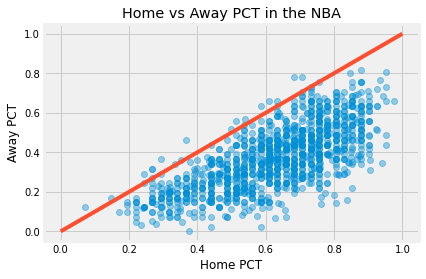

In [6]:
plt.plot(NBA.HomePCT, NBA.AwayPCT,'o', alpha = 0.4)
plt.plot([0,1],[0,1])
plt.xlabel('Home PCT')
plt.ylabel('Away PCT')
plt.title('Home vs Away PCT in the NBA')

In [7]:
# Create random noise between 0 and 0,01
np.random.normal(0,0.01,len(NBA))

array([-0.01426019, -0.02078986, -0.00329146, ..., -0.00998526,
       -0.01208749,  0.00548951])

Text(0.5, 1.0, 'Home vs Away PCT in the NBA')

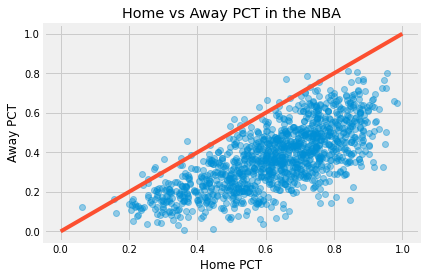

In [8]:
plt.plot(NBA.HomePCT + np.random.normal(0,0.01,len(NBA)),NBA.AwayPCT + np.random.normal(0,0.01,len(NBA)),'o', alpha = 0.4)
plt.plot([0,1],[0,1])
plt.xlabel('Home PCT')
plt.ylabel('Away PCT')
plt.title('Home vs Away PCT in the NBA')

In 1216 NBA teams over the last 50 years, only 16 teams performed away better than at home

In [9]:
# soccer data
Soccer.head()

,Sport,Country,League,Year,Season,Team,Games,HomeWins,HomeDraw,HomeLoss,HomeRatio,AwayWins,AwayDraw,AwayLoss,AwayGoalsDiff,Unnamed: 15
0,Football,Algeria,Algeria-Ligue-1,2010,-,MC Oran,34,10,5,2,11,0,6,11,-20,NaN
1,Football,Algeria,Algeria-Ligue-1,2010,-,NA Hussein Dey,34,3,5,9,-8,0,5,12,-19,NaN
2,Football,Algeria,Algeria-Ligue-1,2011,-,MC El Eulma,29,9,3,2,13,0,6,9,-19,NaN
3,Football,Algeria,Algeria-Ligue-1,2011,-,Annaba,29,10,5,0,14,0,1,13,-23,NaN
4,Football,Algeria,Algeria-Ligue-1,2012,-,Khroub,30,7,5,3,0,0,5,10,-23,NaN


In [10]:
# Create the percentage of Home and Away wins 
Soccer['HomePCT'] = np.true_divide(Soccer['HomeWins'],Soccer['HomeWins'] + Soccer['HomeLoss'] + Soccer['HomeDraw'])
Soccer['AwayPCT'] = np.true_divide(Soccer['AwayWins'],Soccer['AwayWins'] + Soccer['AwayLoss'] + Soccer['AwayDraw'])

(0.0, 1.0)

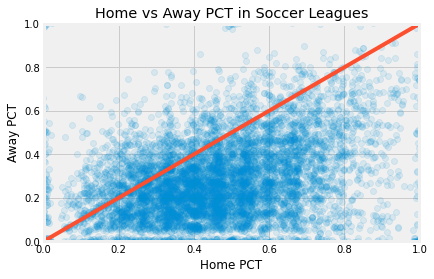

In [11]:
# Plot with Random noise
plt.plot(Soccer.HomePCT + np.random.normal(0,0.01,len(Soccer)),Soccer.AwayPCT + np.random.normal(0,0.01,len(Soccer)),'o', alpha = 0.1)
plt.plot([0,1],[0,1])
plt.xlabel('Home PCT')
plt.ylabel('Away PCT')
plt.title('Home vs Away PCT in Soccer Leagues')
plt.xlim([0,1])
plt.ylim([0,1])

# So in which sport the home advantages is more significant?

In [12]:
# Let'sdefine the home factor as following:(Home PCT - away PCT)(Home PCT + away PCT)
# The value would range from -1 to 1, where 1 implies maximal home advatage, and the opposite for -1.
NBA['Home_Factor'] = np.true_divide((NBA.HomePCT - NBA.AwayPCT),(NBA.HomePCT + NBA.AwayPCT))
Soccer['Home_Factor'] = np.true_divide((Soccer.HomePCT - Soccer.AwayPCT),(Soccer.HomePCT + Soccer.AwayPCT))

Text(0.5, 0, 'Home Factor')

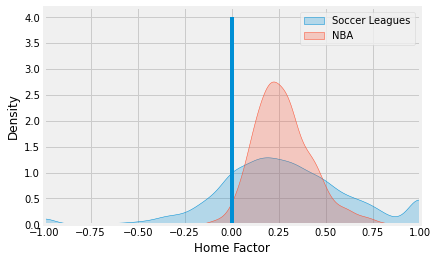

In [13]:
import seaborn as sns

# Using Seaborns Kernel Density Plot
sns.kdeplot(Soccer.Home_Factor, shade = True)
sns.kdeplot(NBA.Home_Factor, shade = True)
plt.xlim([-1,1])
plt.legend(['Soccer Leagues','NBA'])
plt.plot([0,0],[0,4])
plt.xlabel('Home Factor')

Text(0, 0.5, 'Away Goals Difference')

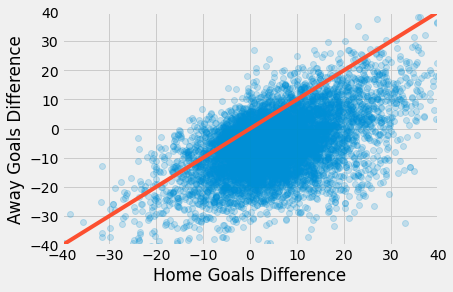

In [14]:
# Let's see how the goal difference changes between home and away
plt.style.use('fivethirtyeight')
plt.plot(Soccer.HomeRatio + np.random.normal(0,0.5,len(Soccer)),Soccer.AwayGoalsDiff+ np.random.normal(0,0.5,len(Soccer)),'o', alpha = 0.2)
plt.plot([-100,80],[-100,80])
plt.xlim([-40,40])
plt.ylim([-40,40])
plt.xlabel('Home Goals Difference')
plt.ylabel('Away Goals Difference')

(1950.0, 2010.0)

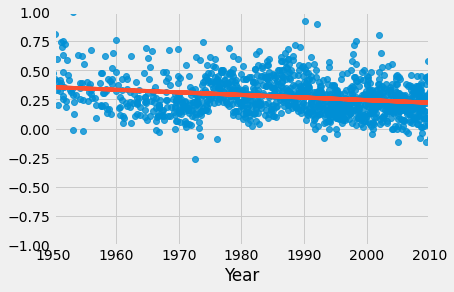

In [15]:
# Has the effect changed over time
plt.plot(NBA.Year + np.random.normal(0,0.5,len(NBA)),NBA.Home_Factor,'o', alpha = 0.8)
x = NBA.Year
y = NBA.Home_Factor
fn = np.polyfit(x,y,1)
fit_fn = np.poly1d(fn) 
plt.plot(x,fit_fn(x))
plt.xlabel('Year')
plt.ylim([-1,1])
plt.xlim([1950,2010])

In [16]:
Countries.head()

,Country,Region,Population,Area,PopDensity,Coastline,Net migration,Infant_mortality,GDP,Literacy,Phones,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,FIFA_Rank,UEFA_Rank,Attendance,Home_Away_Contrast
0,Nigeria,SUB-SAHARAN AFRICA,131859731,923768,142.7,0.09,0.26,98.80,900.0,68.0,9.3,31.29,2.96,65.75,1.5,40.43,16.94,0.269,0.487,0.244,62,NaN,NaN,0.836696
1,Guatemala,LATIN AMER. & CARIB,12293545,108890,112.9,0.37,-1.67,35.93,4100.0,70.6,92.1,12.54,5.03,82.43,2.0,29.88,5.20,0.227,0.188,0.585,95,NaN,NaN,0.641629
2,Indonesia,ASIA (EX. NEAR EAST),245452739,1919440,127.9,2.85,0.00,35.60,3200.0,87.9,52.0,11.32,7.23,81.45,2.0,20.34,6.25,0.134,0.458,0.408,178,NaN,9368.0,0.586193
3,Ghana,SUB-SAHARAN AFRICA,22409572,239460,93.6,0.23,-0.64,51.43,2200.0,74.8,14.4,16.26,9.67,74.07,2.0,30.52,9.72,0.366,0.246,0.387,41,NaN,NaN,0.558027
4,Uzbekistan,C.W. OF IND. STATES,27307134,447400,61.0,0.00,-1.72,71.10,1700.0,99.3,62.9,10.83,0.83,88.34,1.0,26.36,7.84,0.342,0.229,0.430,74,NaN,6911.0,0.486008


Text(0.5, 0, 'Average Attandance per game in the league')

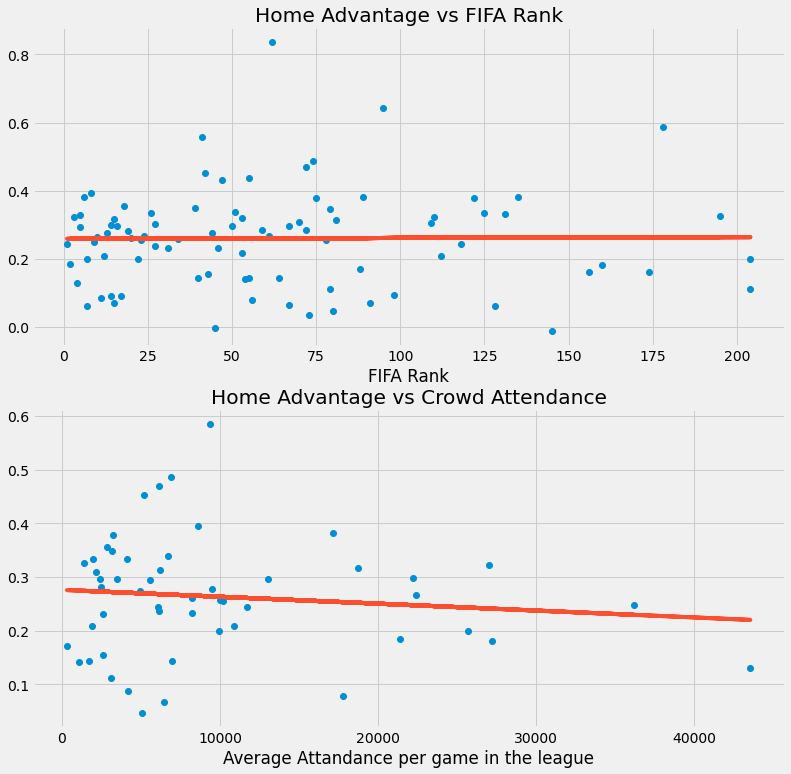

In [17]:
plt.figure(figsize = (12,12))
plt.subplot(2,1,1)
plt.title('Home Advantage vs FIFA Rank')
plt.plot(Countries.FIFA_Rank, Countries.Home_Away_Contrast,'o')
x = Countries.FIFA_Rank
y = Countries.Home_Away_Contrast
fn = np.polyfit(x,y,1)
fit_fn = np.poly1d(fn) 
plt.plot(x,fit_fn(x))
plt.xlabel('FIFA Rank')

plt.subplot(2,1,2)
plt.title('Home Advantage vs Crowd Attendance')
plt.plot(Countries.Attendance, Countries.Home_Away_Contrast,'o')
x = Countries.Attendance[Countries.Attendance>0]
y = Countries.Home_Away_Contrast[Countries.Attendance>0]
fn = np.polyfit(x,y,1)
fit_fn = np.poly1d(fn) 
plt.plot(x,fit_fn(x))
plt.xlabel('Average Attandance per game in the league')

Text(0.5, 1.0, 'Literacy')

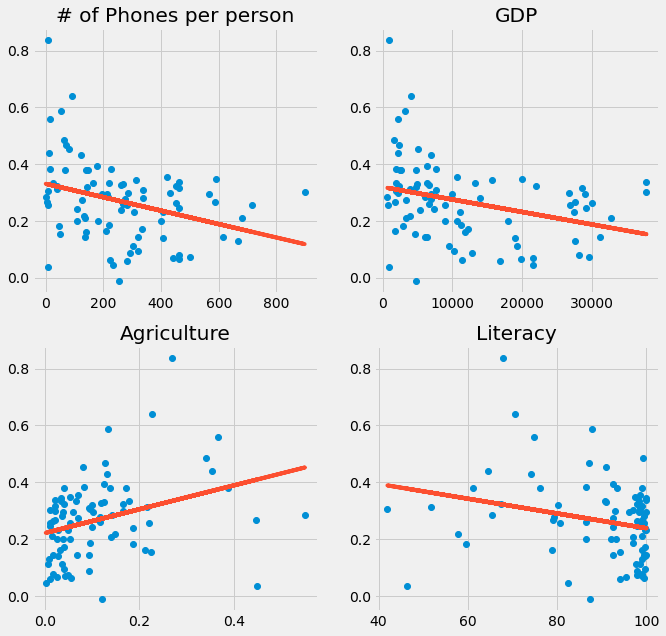

In [18]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
x = Countries.Phones[Countries.Phones>0]
y = Countries.Home_Away_Contrast[Countries.Phones>0]
fn = np.polyfit(x,y,1)
fit_fn = np.poly1d(fn) 
plt.plot(x,y,'o')
plt.plot(x,fit_fn(x))
plt.title('# of Phones per person')

plt.subplot(2,2,2)
x = Countries.GDP[Countries.GDP>0]
y = Countries.Home_Away_Contrast[Countries.GDP>0]
fn = np.polyfit(x,y,1)
fit_fn = np.poly1d(fn) 
plt.plot(x,y,'o')
plt.plot(x,fit_fn(x))
plt.title('GDP')

plt.subplot(2,2,3)
x = Countries.Agriculture[Countries.Agriculture>0]
y = Countries.Home_Away_Contrast[Countries.Agriculture>0]
fn = np.polyfit(x,y,1)
fit_fn = np.poly1d(fn) 
plt.plot(x,y,'o')
plt.plot(x,fit_fn(x))
plt.title('Agriculture')

plt.subplot(2,2,4)
x = Countries.Literacy[Countries.Literacy>0]
y = Countries.Home_Away_Contrast[Countries.Literacy>0]
fn = np.polyfit(x,y,1)
fit_fn = np.poly1d(fn) 
plt.plot(x,y,'o')
plt.plot(x,fit_fn(x))
plt.title('Literacy')

### The more developed the country, the less significant the home advantage (in soccer at least) is!

# Anyone remember Brazil vs Germany in the 2014 WC? Yea Home advantage isn't always a thing!

![](https://i.ytimg.com/vi/TAj1sOEEcmQ/maxresdefault.jpg)